# Machine Learning Supervised 2 Assignment

## Team Members: 
#### Abhishek Maji - 12110101
#### Chitra Nair - 12110058 
#### Deepika Rawat - 12110074
#### Shephali Bhardwaj - 12110010

## Case Study: 

Improving lead generation at Eureka Forbes using Machine Learning algorithms 

## Background 

### Introduction to Eureka Forbes 

With an impressive portfolio of products and solutions in water purification, vacuum cleaning, air purification and security solutions, Eureka Forbes was a market leader in the water purification industry in India. 

They had a 200 million customer base in 40+ countries, with a strong presence in 850 cities in India. Furthermore, to keep evolving, they invested close to 3-4% of their turnover on research and development. 

What was the reason behind their massive success? 

Their massive network of direct sales force, franchise partners, dealers and distributores, institutional channels and rural channels.

However, this network also came with a major challenge: the rising costs of physically chasing leads, inspite of their website. 


### The Problem  

Due to the high costs of physical lead generation, Eureka Forbes wanted to go beyond their traditional means of direct sales generation and tap into their digital footprint. They wanted to enhance their digital efforts, through which they could augment their sales generation, while minimizing physical lead generation costs. 

When we look at the Eureka Forbes website, it had everything a customer could potentially ask for - from the exhaustive list of product details and post-sales services to the detailed blogs. What's more, millions of customers visited the website daily, leading to a vast amount of data that could be leveraged for digital campaigns. 

But only a few converted to become actual customers.

Their CTO, Shashank Sinha, saw immense potential in the vast data generated from the website.analyze customer behaviour and target potential leads for their wide range of products at minimized lead interaction costs. 

### Objective 

There were two key objectives for this project: 

- To maximize lead generation through Eureka Forbes' digital website 
- To minimize the cost of physical lead generation and potential customers with lesser propensity to buy Eureka Forbes' products 

### Dataset

The dataset generated had an exhaustive set of datapoints such as:

 1   DemoReqPg_CallClicks_evt_count   - The event fired for demo calls                                                         
 2   air_purifier_page_top   - The time spent on the air purifier page                                                         
 3   bookdemo_in_7days   - 
 4   bounces - Total number of single page (or single interaction hit) sessions for the property  
 5   checkout_page_top - The time spent on the checkout page              
 6   contactus_top - The time spent on the Contact Us page  
 7   country – the user’s country type (whether they are domestic or international)   
 8   customer_service_amc_login_top – Time spent on the customer service amc login     
 9   customer_service_request_login_top – Time spent on the customer service request login                        
 10  demo_page_top - – Time spent on the demo page 
 11  device – The device the user used while working  
 12  dsls – Day since the last session  
 13  fired_DemoReqPg_CallClicks_evt – Event fired for demo calls  
 14  fired_help_me_buy_evt   - Event fired for ‘Help Me Buy’ CTA  
 15  fired_phone_clicks_evt  - Event fired for ‘Phone Clicks’ CTA                   
 16  goal3Completions – Book Demo Thank You (Goal 3 Completions) 
 17  goal4Completions – Book Demo Thank You(Goal 4 Completions)                                
 18  goal7Completions - – Book Demo Thank You (Goal 7 Completions)  
 19  help_me_buy_evt_count – Event count for ‘Help Me Buy’ CTA 
 20  newUser  - To check if the user’s new          
 21  offer_page_top – Time spent on the offers page  
 22  pageviews – The number of page views     
 23  paid  - Whether the user came to the website through a paid campaign   
 24  phone_clicks_evt_count – Event count for Phone Clicks CTA 
 25  region – Users region (derived from their geo location)  
 26  security_solutions_page_top – Time spent on the security solutions page  
 27  sessionDuration – Total duration (in seconds) of a user’s stay     
 28  sessions – Total number of sessions per user         
 29  sourceMedium – Combined values of ga: source and ga: medium   
 30  storelocator_top - Time spent on the store locator page                        
 31  successbookdemo_top  - Time spent on the Success Book Demo page 
 32  vacuum_cleaner_page_top  - Time spent on the Vacuum Cleaner page  
 33  visited_air_purifier_page – If user visited the Air Purifier page 
 34  visited_checkout_page - If user visited the Checkout page             
 35  visited_contactus - If user visited the Contact Us page
 36  visited_customer_service_amc_login - If user visited the Customer Service AMC page   
 37  visited_customer_service_request_login - If user visited the Customer Service Request Login page  
 38  visited_demo_page - If user visited the demo page        
 39  visited_offer_page - If user visited the offer page
 40  visited_security_solutions_page - If user visited the security solutions page 
 41  visited_storelocator - If user visited the storelocator page                                                               
 42  visited_successbookdemo - If user visited the success book demo page                                                       
 43  visited_vacuum_cleaner_page - If user visited the Visit Vacuum Cleaner Page                                              
 44  visited_water_purifier_page - If user visited the Water Purifier page                                                   
 45  water_purifier_page_top - Time spent on the Water Purifier page               
 46  callclick_in_7days                                                                                
 47  converted – whether the lead has been converted or not                                                                     

## Data Exploration

### Preliminary Analysis For Business Understanding 
##### Understanding and conducting structured based data exploration and taking care of missing values, if any 

First, we add the relevant packages 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,KFold
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import warnings
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
from sklearn.metrics import precision_score

In [6]:
warnings.filterwarnings("ignore")

Now, we read the dataset and create dataframes. 

In [7]:
df = pd.read_csv('eureka_train.csv')
print('Dataset shape: {}'.format(df.shape))
print('-Dataset examples-')
df.head()

Dataset shape: (42264, 48)
-Dataset examples-


,index,DemoReqPg_CallClicks_evt_count,air_purifier_page_top,bookdemo_in_7days,bounces,checkout_page_top,contactus_top,country,customer_service_amc_login_top,customer_service_request_login_top,...,visited_demo_page,visited_offer_page,visited_security_solutions_page,visited_storelocator,visited_successbookdemo,visited_vacuum_cleaner_page,visited_water_purifier_page,water_purifier_page_top,callclick_in_7days,converted
0,574305,0.0,0.0,0,0.0,0.0,0.0,d,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,283735,0.0,0.0,0,8.0,0.0,0.0,i,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,377029,0.0,0.0,0,0.0,0.0,0.0,d,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,75833,1.0,0.0,0,0.0,0.0,532.0,d,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,703487,0.0,0.0,0,1.0,0.0,0.0,d,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


Let's try to understand the various columns in this dataset further. 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42264 entries, 0 to 42263
Data columns (total 48 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   index                                   42264 non-null  int64  
 1   DemoReqPg_CallClicks_evt_count          42264 non-null  float64
 2   air_purifier_page_top                   42264 non-null  float64
 3   bookdemo_in_7days                       42264 non-null  int64  
 4   bounces                                 42264 non-null  float64
 5   checkout_page_top                       42264 non-null  float64
 6   contactus_top                           42264 non-null  float64
 7   country                                 42264 non-null  object 
 8   customer_service_amc_login_top          42264 non-null  float64
 9   customer_service_request_login_top      42264 non-null  float64
 10  demo_page_top                           42264 non-null  fl

Now, let's check for null values within the data columns of the dataframe. 

In [9]:
with pd.option_context('display.max_columns', 40):
    print(df.describe())

               index  DemoReqPg_CallClicks_evt_count  air_purifier_page_top  \
count   42264.000000                    42264.000000           42264.000000   
mean   358421.801202                        0.040791               2.338681   
std    205489.638655                        0.247443              44.347503   
min         7.000000                        0.000000               0.000000   
25%    180008.250000                        0.000000               0.000000   
50%    361762.000000                        0.000000               0.000000   
75%    538395.500000                        0.000000               0.000000   
max    709317.000000                       11.000000            3182.000000   

       bookdemo_in_7days       bounces  checkout_page_top  contactus_top  \
count            42264.0  42264.000000       42264.000000   42264.000000   
mean                 0.0      0.580589           4.814878       6.499125   
std                  0.0      1.396040          67.353324   

On running the code, we can observe that the data is clean and has no null values in any column.

After this, let's visualize the data. 

#### Website Interaction Specific Visualization

- Visualization for the 'Demo Request Page_Call Clicks'

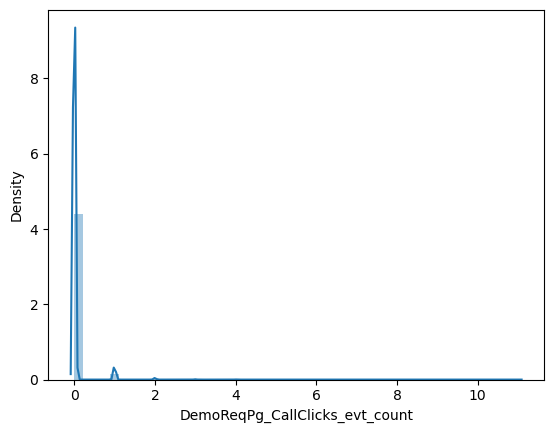

In [10]:
sns.distplot(df['DemoReqPg_CallClicks_evt_count'])
plt.show()

- Visualization for the 'whether the user has visited the demo page'

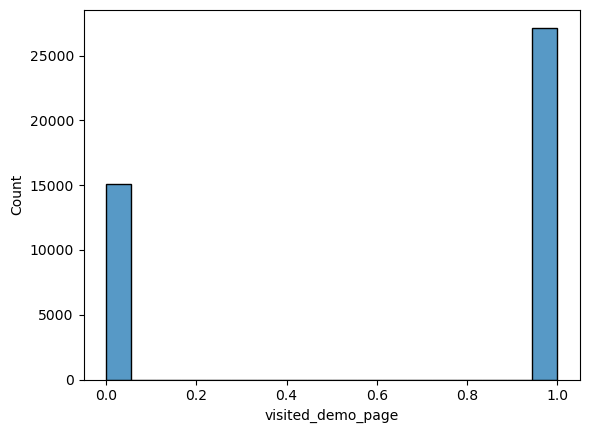

In [11]:
sns.histplot(df['visited_demo_page'])
plt.show()

- Visualization for the 'Time spent on the demo page'

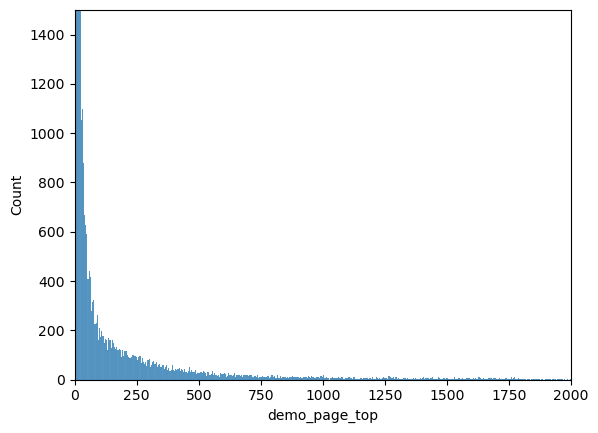

In [12]:
sns.histplot(df['demo_page_top'])
plt.ylim(0,1500)
plt.xlim(0,2000)
plt.show()

- Visualization for the 'Thank you' page for booking the demo

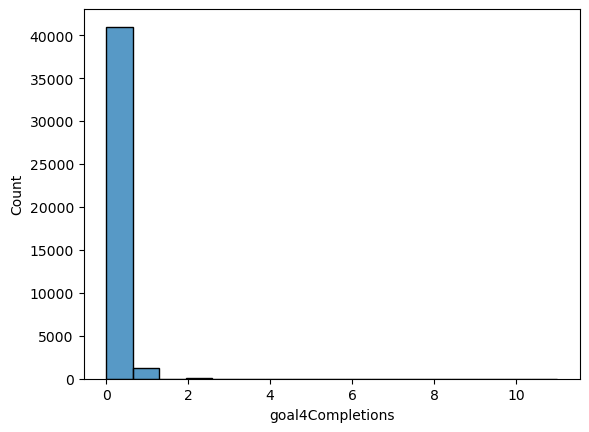

In [13]:
sns.histplot(df['goal4Completions'])
plt.show()

- Visualization for number of sessions by a particular user 

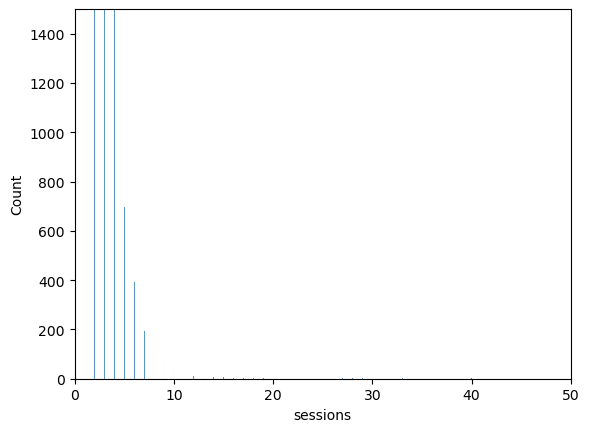

In [14]:
sns.histplot(df['sessions'])
plt.ylim(0,1500)
plt.xlim(0,50)
plt.show()

- Visualization of 'The day since the last session'

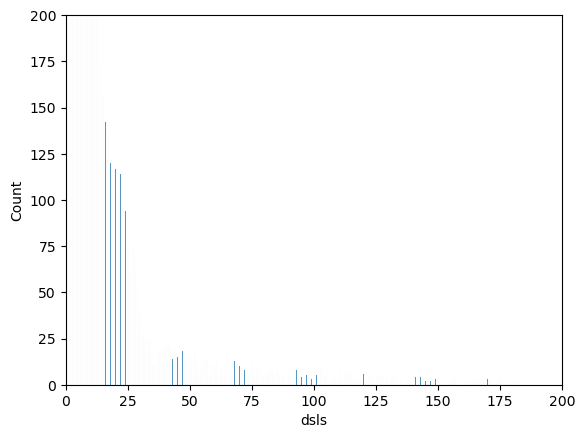

In [15]:
sns.histplot(df['dsls'])
plt.ylim(0,200)
plt.xlim(0,200)
plt.show()

- Visualization of 'The number of bounces' 

In [16]:
import pandas as pd
df = pd.read_csv('eureka_train.csv')
import seaborn as sns
sns_plot = sns.distplot(df["bounces"])

- Visualization of 'Time spent on two key product pages - Water Purifier and Air Purifier'  

In [17]:
sns_plot = sns.distplot(df["water_purifier_page_top"])


In [18]:
sns_plot = sns.distplot(df["air_purifier_page_top"])

##### From here, we can observe that the data in quite a few columns (Barring the ones asking the 'Yes/No' questions), it's  is right skewed.

#### Business Insights through graphs 

- Visualization of the 'Top 10 Regions from where we received the highest number of visitors.' 

In [19]:
Regions = df.region.value_counts()
Top_10_Regions = Regions.head(10)
plt.figure(figsize=(10,5))
ax = plt.subplot()
Top_10_Regions.plot(kind='bar',ax = ax)


<AxesSubplot:>

From here, we can see that the concentration of the visitors on the website is dominated by 10 Indian states.

- Vizualisation on the 'Distribution of domestic and international visitors' 

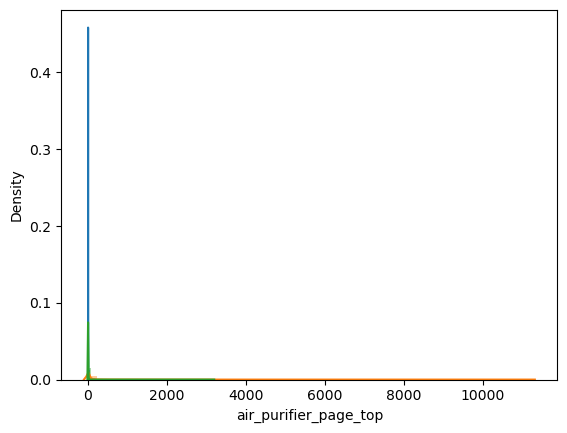

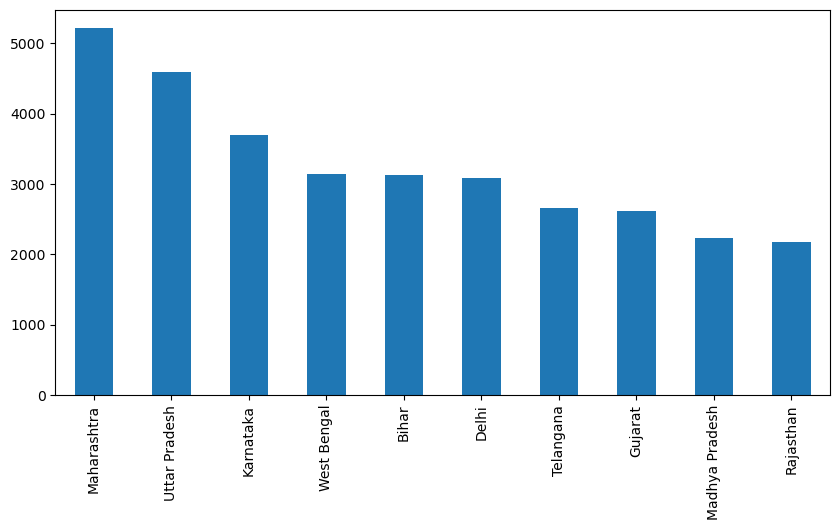

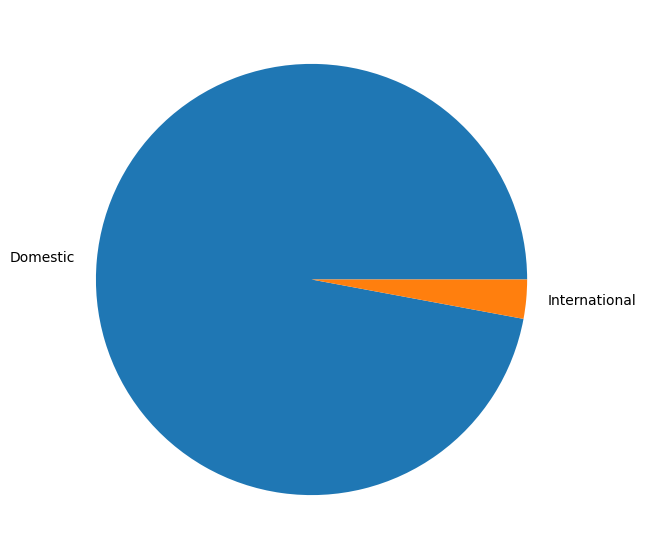

In [20]:
country_category = df.country.value_counts()
country_label = ['Domestic', 'International']

# Generating the plot 
fig = plt.figure(figsize =(10, 7))
plt.pie(country_category, labels = country_label)
plt.show()


### Assignment-Specific Questions for EDA 

###### 1. What is the difference in percentage of conversion by domestic compared to international clients?

In [21]:
domestic_coversion = 0 #Variable for domestic total conversions
internation_coversion = 0 #Variable for international total conversions
domestic_hits = 0 #Variable for total domestic hits
international_hits = 0 #Variable for total international hits

for index, row in df.iterrows(): #dataframe for loop
    if row['country'] == 'd':                     #check if country column is assigned as domestic or international
        domestic_hits += 1                        #variable to count domestic conversion
        domestic_coversion += row['converted']
    else:
        international_hits += 1                   #variable to count international conversion
        internation_coversion += row['converted'] 

print('Total Domestic Customers: {}'.format(domestic_hits))
print('Domestic Coversion: {}'.format(domestic_coversion))

print('Total International Customers: {}'.format(international_hits))
print('International Coversion: {}'.format(internation_coversion))

#percentage for conversion percentage of all domestic customers
dom_per = (domestic_coversion * 100)/domestic_hits

#percentage for conversion percentage of all international customers
int_per = (internation_coversion * 100)/international_hits

print('Domestic Coversion percentage: {:.2f}%'.format(dom_per))
print('International Coversion percentage: {:.2f}%'.format(int_per))

Total Domestic Customers: 41028
Domestic Coversion: 2176
Total International Customers: 1236
International Coversion: 88
Domestic Coversion percentage: 5.30%
International Coversion percentage: 7.12%


Out of 41,028 domestic customers, only 2,176 converted which comes to the percentage of 5.30% wherease out of 1,236 International customers, only 88 got converted which comes to 7.12%

###### 2. What are the top 10 source mediums of users visiting the site?

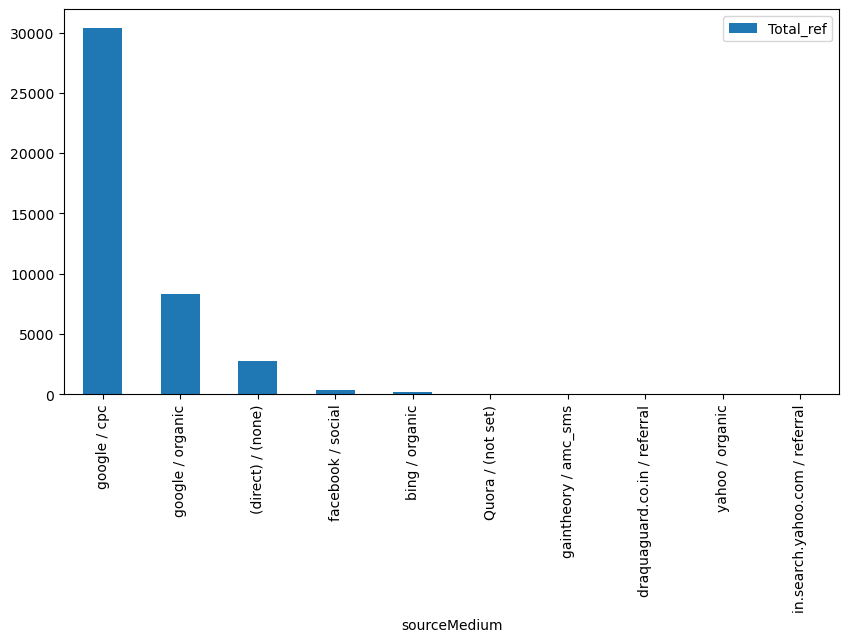

In [22]:
#Identify unique visiting mediums
df['sourceMedium'].unique()

def get_source(x): #function to count the no. source mediums in each category
     return pd.Series(dict(Total_ref = x['sourceMedium'].count(),
                        ))
source_df = df.groupby('sourceMedium').apply(get_source) 
source_df = source_df.sort_values("Total_ref", ascending=False) #sorting values high to low
top_10_source = source_df.head(10) #fetching top 10 values

# Plot for representing unique source mediums by which users are visiting.
plt.figure(figsize=(10,5))
ax = plt.subplot()
top_10_source.plot(kind='bar',ax = ax)
plt.show()

By above chart, the top 3 performing source mediums are google/cpc, google/organic and direct.

######  3. Is there any difference in time spent on the water purifier page between users who converted and users who did not convert?

In [23]:
total_wp_visitors = 0 #Variable for total people who spent time on water purifier page
wp_converted = 0 #Variable for converted users who spent time on water purifier page
wp_not_converted = 0 #Variable for not converted users who spent time on water purifier page
wp_converted_sessiontime = 0 #Variable for total session time for converted users who spent time on water purifier page
wp_not_converted_sessiontime = 0 #Variable for total session time for not converted users who spent time on water purifier page

for index, row in df.iterrows(): #dataframe for loop
    if row['visited_water_purifier_page'] == 1:  #condition for customers who visited water purifier page.
        total_wp_visitors += 1                  #variable for total WP visitors
        if row['converted'] == 1:               #condition if they converted
            wp_converted += 1
            wp_converted_sessiontime += row['sessionDuration']
        else:
            wp_not_converted += 1
            wp_not_converted_sessiontime += row['sessionDuration']

#Average time spent by user who was converted and visited water purifier page
avg_wp_converted_sessiontime = wp_converted_sessiontime/wp_converted

#Average time spent by user who was did not convert and visited water purifier page
avg_wp_not_converted_sessiontime = wp_not_converted_sessiontime/wp_not_converted

print('Avg time spent by Converted users from water purifier page: {:.2f} seconds'.format(avg_wp_converted_sessiontime))
print('Avg time spent by Not Converted users from water purifier page: {:.2f} seconds'.format(avg_wp_not_converted_sessiontime))

Avg time spent by Converted users from water purifier page: 673.91 seconds
Avg time spent by Not Converted users from water purifier page: 534.33 seconds


Avg time spent by Converted users from water purifier page: 673.91 seconds
Avg time spent by Not Converted users from water purifier page: 534.33 seconds

The average time spent by the users who were converted was 674 seconds whereas users who did not convert spent on an average 534 seconds.

##### 4. Kashif has the following claims from this business understanding. How do you test his claims and make necessary conclusions?

##### a. Customers using mobile, desktop, and tablet are equally distributed.

In [24]:
def get_device(x):  #function fo unique device count
     return pd.Series(dict(Total_ref = x['device'].count(),
                        ))
# count the device distribution used by customers
device_df = df.groupby('device').apply(get_device) 
device_df

,Total_ref
device,
desktop,5545
mobile,36370
tablet,349


The data suggests otherwise. The devices are not equally distributed. Even graphically, we can see that the highest number of customers are visiting the website from their mobile devices. 

###### b. Customers who convert spend more time on the website

In [26]:
#average total session by the customers who were converted
coverted_sessiontotal = df[df['converted']==1]['sessionDuration'].mean()

#average total session by the customers who did not convert
notcoverted_sessiontotal = df[df['converted']==0]['sessionDuration'].mean()

print('Average session duration for who converted: {:.2f} seconds'.format(coverted_sessiontotal))
print('Average session duration for who did not convert: {:.2f} seconds'.format(notcoverted_sessiontotal))

Average session duration for who converted: 340.96 seconds
Average session duration for who did not convert: 313.05 seconds


Average session duration for who converted: 340.96 seconds
Average session duration for who did not convert: 313.05 seconds

In [27]:
corr = df['sessionDuration'].corr(df['converted']) # Correlation between session duration and the conversion
corr

0.011174914442004193

The average session difference between customer who converted and who did not convert is not much. Also, We can see from above output that session duration has a very low correlation with conversion. Hence it is safe to say that costomer conversion has nothing to do with spending more time on website.

## Classification Modelling

### Data Cleaning
- From the above prelimary EDA, we have observed that there are lot of columns that have 0 values. We will not consider them for our analysis and proceed to drop them.

In [28]:
df.drop('index', inplace=True, axis=1)
df.drop('bookdemo_in_7days',inplace = True,axis=1)
df.drop('goal3Completions',inplace = True,axis=1)
df.drop('goal7Completions',inplace = True,axis=1)
df.drop('callclick_in_7days',inplace=True,axis =1)

- After this, we will convert all the counts appearing as float to int.

In [29]:
df['DemoReqPg_CallClicks_evt_count'] = df['DemoReqPg_CallClicks_evt_count'].fillna(0).astype(int)
df['air_purifier_page_top'] = df['air_purifier_page_top'].fillna(0).astype(int)
df['bounces'] = df['bounces'].fillna(0).astype(int)
df['checkout_page_top'] = df['checkout_page_top'].fillna(0).astype(int)
df['contactus_top'] = df['contactus_top'].fillna(0).astype(int)
df['customer_service_amc_login_top'] = df['customer_service_amc_login_top'].fillna(0).astype(int)
df['customer_service_request_login_top'] = df['customer_service_request_login_top'].fillna(0).astype(int)
df['demo_page_top'] = df['demo_page_top'].fillna(0).astype(int)
df['fired_DemoReqPg_CallClicks_evt'] = df['fired_DemoReqPg_CallClicks_evt'].fillna(0).astype(int)
df['fired_help_me_buy_evt'] = df['fired_help_me_buy_evt'].fillna(0).astype(int)
df['fired_phone_clicks_evt'] = df['fired_phone_clicks_evt'].fillna(0).astype(int)
df['goal4Completions'] = df['goal4Completions'].fillna(0).astype(int)
df['help_me_buy_evt_count'] = df['help_me_buy_evt_count'].fillna(0).astype(int)
df['offer_page_top'] = df['offer_page_top'].fillna(0).astype(int)
df['pageviews'] = df['pageviews'].fillna(0).astype(int)
df['phone_clicks_evt_count'] = df['phone_clicks_evt_count'].fillna(0).astype(int)
df['security_solutions_page_top'] = df['security_solutions_page_top'].fillna(0).astype(int)
df['sessionDuration'] = df['sessionDuration'].fillna(0).astype(int)
df['sessions'] = df['sessions'].fillna(0).astype(int)
df['storelocator_top'] = df['storelocator_top'].fillna(0).astype(int)
df['successbookdemo_top'] = df['successbookdemo_top'].fillna(0).astype(int)
df['vacuum_cleaner_page_top'] = df['vacuum_cleaner_page_top'].fillna(0).astype(int)
df['visited_air_purifier_page'] = df['visited_air_purifier_page'].fillna(0).astype(int)
df['visited_checkout_page'] = df['visited_checkout_page'].fillna(0).astype(int)
df['visited_contactus'] = df['visited_contactus'].fillna(0).astype(int)
df['visited_customer_service_amc_login'] = df['visited_customer_service_amc_login'].fillna(0).astype(int)
df['visited_customer_service_request_login'] = df['visited_customer_service_request_login'].fillna(0).astype(int)
df['visited_demo_page'] = df['visited_demo_page'].fillna(0).astype(int)
df['visited_offer_page'] = df['visited_offer_page'].fillna(0).astype(int)
df['visited_security_solutions_page'] = df['visited_security_solutions_page'].fillna(0).astype(int)
df['visited_storelocator'] = df['visited_storelocator'].fillna(0).astype(int)
df['visited_successbookdemo'] = df['visited_successbookdemo'].fillna(0).astype(int)
df['visited_vacuum_cleaner_page'] = df['visited_vacuum_cleaner_page'].fillna(0).astype(int)
df['water_purifier_page_top'] = df['water_purifier_page_top'].fillna(0).astype(int)
df['visited_water_purifier_page'] = df['visited_water_purifier_page'].fillna(0).astype(int)

In [30]:
print(df.isnull().sum())

DemoReqPg_CallClicks_evt_count            0
air_purifier_page_top                     0
bounces                                   0
checkout_page_top                         0
contactus_top                             0
country                                   0
customer_service_amc_login_top            0
customer_service_request_login_top        0
demo_page_top                             0
device                                    0
dsls                                      0
fired_DemoReqPg_CallClicks_evt            0
fired_help_me_buy_evt                     0
fired_phone_clicks_evt                    0
goal4Completions                          0
help_me_buy_evt_count                     0
newUser                                   0
offer_page_top                            0
pageviews                                 0
paid                                      0
phone_clicks_evt_count                    0
region                                    0
security_solutions_page_top     

### Setting x and y variables
    We selected the x and y variables for fitting.

In [31]:
x_features = list(df.columns)
x_features.remove('converted')

In [32]:
x = df[x_features]
y = df['converted']

### Feature Selection

In order to get the most important features, we first converted the categories into dummy variables. For this, we've used target encoding to mitigate errors and ensure that all the values are numeric in nature. Furthermore, due to the extensive volume of the data, we're using target encoding. 
    
We did Target Encoding to avoid errors and ensure that the values are numeric in nature.  Since there are many features, we’re using this as a first-trial attempt. After this, we're looking at the probability of the features to see which one fits best. 

In [33]:
target_encoder = TargetEncoder(cols=['country','region','device','sourceMedium'], min_samples_leaf=100, smoothing=1000.0)

In [34]:
target_encoder.fit(x,y)

TargetEncoder(cols=['country', 'region', 'device', 'sourceMedium'],
              min_samples_leaf=100, smoothing=1000.0)

In [35]:
df_feature_selection = target_encoder.transform(x)

In [36]:
df_feature_selection['sourceMedium'].unique(),df_feature_selection['region'].unique()

(array([0.06533456, 0.02634889, 0.01484984, 0.03219565, 0.02977992,
        0.02808203, 0.02774783, 0.08764225, 0.02797513, 0.02776121,
        0.05356805, 0.02809539, 0.04071542, 0.04966943, 0.02806867,
        0.02748025, 0.02800186, 0.02805531, 0.31381602, 0.32615035,
        0.40906959, 0.34572014, 0.02801522, 0.02804195]),
 array([0.04247179, 0.08022487, 0.05294734, 0.05811863, 0.06814576,
        0.04264335, 0.04118938, 0.07441521, 0.05827175, 0.06588524,
        0.03254017, 0.0401946 , 0.06056596, 0.06076178, 0.07018994,
        0.06036885, 0.06776115, 0.05377512, 0.03704425, 0.05471167,
        0.06802274, 0.05255874, 0.05209673, 0.02806867, 0.05071098,
        0.08149103, 0.03699435, 0.02800186, 0.02809539, 0.02804195,
        0.05857718, 0.05356805, 0.02784144, 0.02802858, 0.02789492,
        0.02777458, 0.02808203, 0.02772108, 0.05885331, 0.02780133,
        0.02805531, 0.02798849, 0.02801522, 0.02797513, 0.09613812]))

In [37]:
x=df_feature_selection[x_features]

We are going to do feature selection before applying doing any data preprocessing step. We are chosing two techniques primarily
-SFS using decision tree
-Embedded model technique using random forrest

#### A) Choosing SFS technique using decision tree classifier to select features 

In [38]:
DT_Classifier = DecisionTreeClassifier(random_state=100)

In [39]:
criterion = ['gini', 'entropy']
max_depth = [5,6,7,8,9,10,12]

- We select the hyperparameters using gridsearch. 

Using grid search and computing the class weights to balance, we have created the decision tree. Then, we decided the top 25 features, out of the 40+ features. 


In [40]:
param_grid = {"criterion": criterion,
              "max_depth": max_depth}

In [41]:
search_dt = GridSearchCV(DT_Classifier, param_grid,n_jobs=2,cv=10)
search_dt.fit(x,y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10, 12]})

In [42]:
print("Best parameter (CV score=%0.3f):" % search_dt.best_score_)
print(search_dt.best_params_)

Best parameter (CV score=0.946):
{'criterion': 'entropy', 'max_depth': 5}


- Then, we compute class weights to be applied on models for feature selection

In [43]:
class_weights = compute_class_weight(class_weight = "balanced", 
                                     classes = np.unique(y), 
                                     y = y)
class_weights

array([0.5283    , 9.33392226])

In [44]:
class_weight={1:9.334, 0:0.53}

In [45]:
tree = DecisionTreeClassifier(criterion='entropy',max_depth=5,class_weight= class_weight)

In [46]:
sfs = SequentialFeatureSelector(tree,n_features_to_select=25,cv=10)

In [47]:
sfs.fit(x,y)

SequentialFeatureSelector(cv=10,
                          estimator=DecisionTreeClassifier(class_weight={0: 0.53,
                                                                         1: 9.334},
                                                           criterion='entropy',
                                                           max_depth=5),
                          n_features_to_select=25)

In [48]:
sfs_features = [feature for feature, selected in zip(x, sfs.support_) if selected == True]

#### As per SFS technique, the below features are most important: 

In [49]:
sfs_features

['air_purifier_page_top',
 'checkout_page_top',
 'contactus_top',
 'country',
 'customer_service_amc_login_top',
 'customer_service_request_login_top',
 'device',
 'fired_DemoReqPg_CallClicks_evt',
 'fired_help_me_buy_evt',
 'goal4Completions',
 'help_me_buy_evt_count',
 'security_solutions_page_top',
 'storelocator_top',
 'successbookdemo_top',
 'vacuum_cleaner_page_top',
 'visited_air_purifier_page',
 'visited_checkout_page',
 'visited_contactus',
 'visited_customer_service_amc_login',
 'visited_customer_service_request_login',
 'visited_security_solutions_page',
 'visited_storelocator',
 'visited_successbookdemo',
 'visited_vacuum_cleaner_page',
 'visited_water_purifier_page']

#### B) Using Embedded Techniques for Feature Selection
- Now, we use the Random Forest technique for feature selection. From a business standpoint, this technique will aid us in validating the relevance of the variables that we're choosing and detect those features which are obsolete and derive further insights. 

In [50]:
clf_RF = RandomForestClassifier(random_state=0)

- Selecting hypeparamaters through grid search

In [51]:
param_grid_RF = {
        'n_estimators' : [100,125,150],
        'max_features' : [25,"auto"],
        'max_depth' : [5,6,7,8,9]
    }

In [52]:
grid_RF = GridSearchCV(clf_RF, cv=10, param_grid=param_grid_RF,n_jobs=2)

In [53]:
grid_RF.fit(x,y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0), n_jobs=2,
             param_grid={'max_depth': [5, 6, 7, 8, 9],
                         'max_features': [25, 'auto'],
                         'n_estimators': [100, 125, 150]})

In [54]:
print("Best parameter (CV score=%0.3f):" % grid_RF.best_score_)
print(grid_RF.best_params_)

Best parameter (CV score=0.946):
{'max_depth': 5, 'max_features': 'auto', 'n_estimators': 100}


In [55]:
clf_RF_tuned = RandomForestClassifier(random_state=75,n_estimators=100,max_features=25,max_depth=5,class_weight = class_weight)

In [56]:
clf_RF_tuned.fit(x,y)

RandomForestClassifier(class_weight={0: 0.53, 1: 9.334}, max_depth=5,
                       max_features=25, random_state=75)

- Running cross validation on train dataset to get reliable estimation. 

In [57]:
scores_rf = cross_val_score(clf_RF_tuned,
                          x,
                          y,
                          cv = 10)

In [59]:
scores_rf.mean(),scores_rf.std()

(0.6712101379688928, 0.013671097072845757)

In [58]:
pd.set_option('display.float_format', '{:.5}'.format)

##### Now, we find out the most important features as per random forest

In [60]:
d_rf = {'Features':x.columns,'FI': clf_RF_tuned.feature_importances_}
df_rf = pd.DataFrame(d_rf)
df_rf.sort_values('FI',inplace = True,ascending =False)
df_rf.head(25)

,Features,FI
8,demo_page_top,0.20638
16,newUser,0.14282
34,visited_demo_page,0.1378
14,goal4Completions,0.083196
0,DemoReqPg_CallClicks_evt_count,0.064984
11,fired_DemoReqPg_CallClicks_evt,0.062712
24,sessions,0.061558
25,sourceMedium,0.038623
10,dsls,0.028017
23,sessionDuration,0.021141


- Creating the dataframe with selected features as per feature selection techniques

In [61]:
df_Eureka = df[['visited_demo_page',
               'demo_page_top',
               'DemoReqPg_CallClicks_evt_count',
               'goal4Completions',
               'newUser',
               'fired_DemoReqPg_CallClicks_evt',
               'sourceMedium',
               'sessions',
                'dsls',
                'device',
                'successbookdemo_top',
               'water_purifier_page_top',
                'vacuum_cleaner_page_top',
                'visited_successbookdemo',
                'air_purifier_page_top',
               'checkout_page_top',
               'contactus_top',
                'country',
               'customer_service_amc_login_top',
               'customer_service_request_login_top',
               'fired_help_me_buy_evt',
               'help_me_buy_evt_count',
               'converted']]

##### From the above, we can see that we can get rid of many features selected by feature selection technique that does not reduce the precision by more than 2%.  In fact, chosing fewer features increases the precision.

##### With this, we choose 10 features in the end and create a new dataset called df_Eureka 

In [62]:
df_Eureka = df[['visited_demo_page',
            'demo_page_top',
            'newUser',
            'goal4Completions',
            'DemoReqPg_CallClicks_evt_count',
            'fired_DemoReqPg_CallClicks_evt',
            'country',
            'sourceMedium',
            'sessions',
            'dsls',
            'converted'
            ]]

In [63]:
x_feat = list(df_Eureka.columns)
x_feat.remove('converted')

In [64]:
x_imp = df_feature_selection[x_feat]

In [65]:
clf_RF_imp = RandomForestClassifier(random_state=100,n_estimators = 100,max_depth = 5 ,class_weight= class_weight)

- Implementing cross validation scores to evaluate the precision of the data 

In [66]:
scores_rf_imp = cross_val_score(clf_RF_imp,
                          x_imp,
                          y,
                          cv = 10,scoring = 'precision')

In [67]:
scores_rf_imp.mean(),scores_rf_imp.std()

(0.10160776720729296, 0.004179872482009283)

##### From our updated data, there are two categorical variables in our final data frame, which are the country and sourceMedium respectively. 
##### In the country column, we have either d=doemstic or i=international, whereas on the the number of factors for sourcemedium, there are many categorical variables. 

## Defining Transformation 
- We are using 'One Hot Encoding' for 'country' categorical column. 

This would help us binarize the data for the algorithms and models ahead. Furthermore, this is a beneficial technique because of this portion of data isn't ordinal. 

- Target encoding for categorical variable 'sourceMedium'

Since this has multiple categorical variables within, it's more feasible and quicker to perform target encoding.
        

In [68]:
x_sel = list(df_Eureka.columns)
x_sel.remove('converted')

In [69]:
cat_features_set1 = ['country']

In [70]:
cat_features_set2 = ['sourceMedium']

The below features have values as either 1 or 0. Will apply scaling only on numerical (noncat) data columns.

In [71]:
cat_numerical_features = ['visited_demo_page',
                           'newUser',
                           'fired_DemoReqPg_CallClicks_evt']

In [72]:
Noncat_vars = list(set(x_sel) - set(cat_features_set1) - set(cat_features_set2) - set(cat_numerical_features))

In [73]:
ohe_encoder = OneHotEncoder(handle_unknown='ignore')

In [74]:
target_encoder = TargetEncoder()

In [75]:
scaler = StandardScaler()

## Pipeline Creation for Data Transformation

In [76]:
scale_transformer = Pipeline( steps = [('scaler', scaler)])

In [77]:
cat_transformer1 = Pipeline( steps = [('ohencoder', ohe_encoder)])

In [78]:
cat_transformer2 = Pipeline( steps = [('targetencoder',target_encoder)])

In [79]:
preprocessor = ColumnTransformer(transformers=[('catvars1', cat_transformer1, cat_features_set1),('catvars2', cat_transformer2, cat_features_set2),('scaledvars',scale_transformer,Noncat_vars)])

## Data Imbalance Classes

The above data is highly imbalanced dataset with very low conversion rate. To proceed further, we need to try out two data balance techniques and for the models with both sampling techniques to understand which technique offers better precision. 

- Assigning class weights to the y variable

    We assign weights to deal with the bias in the data and modify the algorithm to factor in the skewed distribution that we saw earlier. Furthermore, this will help us with mitigating misclassification of data as well. This will also be instrumental in building our logistic regression model. 
    
    
- Over/under sampling technique

  To ensure that the data is balanced, we have incorporated over-sampling and undersampling techinques. With oversampling, we can ensure that there is no information loss and take care of overfitting by way of over sampling. On the other hand, undersampling would help us enhance the run-time and solve memory problems. 



For this, we have first divided the data into train/test. It is not a mandatory step as we are doing cross validation as well. Note: We are keeping a test dataset untouched so that we can run our final model to check final precision.

In [80]:
train_df, test_df = train_test_split(df_Eureka,
                                     train_size = 0.8,
                                     random_state = 100)

In [81]:
X_train = train_df[x_sel]

In [82]:
y_train = train_df['converted']

In [83]:
X_train.shape,y_train.shape

((33811, 10), (33811,))

In [84]:
X_test = test_df[x_sel]

In [85]:
y_test = test_df['converted']

In [86]:
X_test.shape,y_test.shape

((8453, 10), (8453,))

- Computing class weights for y variable 

In [87]:
class_weights = compute_class_weight(class_weight = "balanced", 
                                     classes = np.unique(y_train), 
                                     y = y_train)
class_weights

array([0.52786798, 9.47086835])

In [88]:
class_weight={1:9.47, 0:0.53}

- Applying under/over sampling

In [89]:
# Separate the case of yes-converted and no-converted
Eureka_no = train_df[y_train == 0]
Eureka_yes = train_df[y_train == 1]

In [90]:
##Upsample the yes-subscribed cases.
Eureka_pos_upsampled = resample(Eureka_yes, 
                                replace=True,     # sample with replacement
                                n_samples=10000) 

##Upsample the yes-subscribed cases.
Eureka_neg_downsampled = resample(Eureka_no, 
                                  replace=False,     # sample without replacement
                                  n_samples=10000) 

# Combine majority class with upsampled minority class
X_train_v1 = pd.concat([Eureka_pos_upsampled, Eureka_neg_downsampled])

- We will apply two kind of sampling technique to create different experiments. One where we will assign weights to models and second where we will consider dataset with unde/over sampling technique applied.

- Now that we have applied under and over sampling, we create the x and y variables for the dataframe to build the model 

In [91]:
X_1 = X_train_v1[x_sel]

In [92]:
y_1 = X_train_v1['converted']

## Model Building

For this particular case study, we have used the following models: 

- Voting 
    - Logistic Regression
    - KNeighborsClassifer
    - Decision Tree
   
   
   
   
 
- Bagging
    - Random Forest
    
    
    
- Boosting
    - Adboost
    
    


    
- Gradient Boosting
    - XGboost

### Voting 

- First, we define the logistic regression with class_weight.  

In [93]:
log_clf_clswt = LogisticRegression(random_state = 500,
                             class_weight=class_weight,
                             max_iter=1000)

In [94]:
log_pipe_clswt = Pipeline(steps=[('preprocessor', preprocessor),
                      ('log_classifier', log_clf_clswt)]) 

In [95]:
scores_log_clswt = cross_val_score(log_pipe_clswt,
                          X_train,
                          y_train,
                          cv = 10,scoring = 'precision')
scores_log_clswt.mean(),scores_log_clswt.std()

(0.11194812545567993, 0.007905466519162085)

- Then, we define logistic regression with under/over sampling

In [96]:
log_clf_sample = LogisticRegression(random_state = 500,
                             max_iter=1000)

In [97]:
log_pipe_sample = Pipeline(steps=[('preprocessor', preprocessor),
                      ('log_classifier', log_clf_sample)])

In [98]:
scores_log_sample = cross_val_score(log_pipe_sample,
                          X_1,
                          y_1,
                          cv = 10,scoring = 'precision')
scores_log_sample.mean(),scores_log_sample.std()

(0.7007844333659576, 0.015433599120701769)

- As we can observe that applying the class_weight to unbalanced dataset does not guarantee us a better precision while applying unde/over sampling technique does result in a better precision

- Then we define the decision tree with class weight 

In [99]:
DT_vote = DecisionTreeClassifier(random_state=100)

In [100]:
criterion = ['gini', 'entropy']
max_depth = [4,5,6,7,8,9,10,12]

In [101]:
param_grid_dt = {"criterion": criterion,
              "max_depth": max_depth}

In [102]:
grid_dt = GridSearchCV(DT_vote, param_grid_dt,n_jobs=2,cv=10)

In [103]:
dt_grid_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('dt_classifier', grid_dt)]) 

In [104]:
dt_grid_pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('catvars1',
                                                  Pipeline(steps=[('ohencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['country']),
                                                 ('catvars2',
                                                  Pipeline(steps=[('targetencoder',
                                                                   TargetEncoder())]),
                                                  ['sourceMedium']),
                                                 ('scaledvars',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['dsls', 'sessions',
                                                 

In [105]:
print("Best parameter (CV score=%0.3f):" % grid_dt.best_score_)
print(grid_dt.best_params_)

Best parameter (CV score=0.947):
{'criterion': 'entropy', 'max_depth': 4}


In [106]:
tree_vote = DecisionTreeClassifier(criterion='entropy',max_depth=4,class_weight= class_weight,random_state = 300)

In [107]:
tree_pipe_clswt = Pipeline(steps=[('preprocessor', preprocessor),
                      ('tree_classifier', tree_vote)]) 

In [108]:
scores_tree_clswt = cross_val_score(tree_pipe_clswt,
                          X_train,
                          y_train,
                          cv = 10,scoring = 'precision')
scores_tree_clswt.mean(),scores_tree_clswt.std()

(0.09757109628705107, 0.004553616259529868)

- Then we define the decision tree with under/oversampling 

In [109]:
tree_vote_sample = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=222)

In [110]:
tree_pipe_sample = Pipeline(steps=[('preprocessor', preprocessor),              
                          ('tree_classifier', tree_vote_sample)])

In [111]:
scores_tree_sample = cross_val_score(tree_pipe_sample,
                          X_1,
                          y_1,
                          cv = 10,scoring = 'precision')
scores_tree_sample.mean(),scores_tree_sample.std()

(0.6375708142419788, 0.006933104418652108)

- Here also we observe the similar pattern, under/over increases the precision. Also, LR's overall precision is better than decision tree.

- Then we define KNN. Here, we don't have class weights as a hyperparameter.

In [112]:
knn_grid = KNeighborsClassifier()

- Let us apply grid search to find optimal kneighbors

In [113]:
kneighbors = [1,2,3,4,5]

In [114]:
param_grid_knn = {"n_neighbors": kneighbors}

In [115]:
grid_knn = GridSearchCV(knn_grid, param_grid_knn,n_jobs=2,cv=10)

In [116]:
knn_grid_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('knn_classifier', grid_knn)])

In [117]:
knn_grid_pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('catvars1',
                                                  Pipeline(steps=[('ohencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['country']),
                                                 ('catvars2',
                                                  Pipeline(steps=[('targetencoder',
                                                                   TargetEncoder())]),
                                                  ['sourceMedium']),
                                                 ('scaledvars',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['dsls', 'sessions',
                                                 

In [118]:
print("Best parameter (CV score=%0.3f):" % grid_knn.best_score_)
print(grid_knn.best_params_)

Best parameter (CV score=0.946):
{'n_neighbors': 4}


- Now, we define KNN with class weights. 

In [119]:
knn = KNeighborsClassifier(n_neighbors = 4)

In [120]:
knn_pipe_clswt = Pipeline(steps=[('preprocessor', preprocessor),
                      ('knn_classifier', knn)])

In [121]:
scores_knn_clswt = cross_val_score(knn_pipe_clswt,
                          X_train,
                          y_train,
                          cv = 10,scoring = 'precision')
scores_knn_clswt.mean(),scores_knn_clswt.std()

(0.1690873015873016, 0.2015642133072431)

- Then, we define KNN with under/over sampling

In [122]:
knn_pipe_sample = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('knn_classifier', knn)])

In [123]:
scores_knn_sample = cross_val_score(knn_pipe_sample,
                          X_1,
                          y_1,
                          cv = 10,scoring = 'precision')
scores_knn_sample.mean(),scores_knn_sample.std()

(0.5877147107547422, 0.004451277981539506)

- For knn the precision is better but std is higher since we did not apply any class weights

- Finally, we define the Voting Classifier. We first define it with class weights.

In [124]:
clf_list_clswt = [('log_clswt', log_pipe_clswt), 
            ('dt_clswt', tree_pipe_clswt), 
            ('knn_clswt', knn_pipe_clswt)]

In [125]:
vote_clf_clswt = VotingClassifier(estimators = clf_list_clswt, 
                            voting='soft')

In [126]:
scores_vote_clswt = cross_val_score(vote_clf_clswt,
                          X_train,
                          y_train,
                          cv = 10,scoring = 'precision')
scores_vote_clswt.mean(),scores_vote_clswt.std()

(0.17022169570914636, 0.02400902388665628)

In [154]:
scores_vote_clswt = cross_val_score(vote_clf_clswt,
                          X_test,
                          y_test,
                          cv = 10,scoring = 'precision')
scores_vote_clswt.mean(),scores_vote_clswt.std()

(0.2140783850301376, 0.052483730822034405)

- Then, we define the Voting Classifier with over/undersampling

In [127]:
clf_list_sample = [('log_smote', log_pipe_sample), 
            ('dt_smote', tree_pipe_sample), 
            ('knn_smote', knn_pipe_sample)]

In [128]:
vote_clf_sample = VotingClassifier(estimators = clf_list_sample, 
                            voting='soft')

In [129]:
scores_vote_sample = cross_val_score(vote_clf_sample,
                          X_1,
                          y_1,
                          cv = 10,scoring = 'precision')

scores_vote_sample.mean(),scores_vote_sample.std()

(0.5933561029970061, 0.004623399478931619)

- The voting embedded technique works better than separate techniques (DT,LR and Knn)

### Bagging

#### First, we define the Random Forest with Class Weight

- Let us apply random search to fine tune our search for grid search later.
Random search will randomly select hyper parameters to get which one give best estimation.

In [130]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [131]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [132]:
rf_random_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('rf_classifier', rf_random)]) 

In [133]:
rf_random_pipe.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('catvars1',
                                                  Pipeline(steps=[('ohencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['country']),
                                                 ('catvars2',
                                                  Pipeline(steps=[('targetencoder',
                                                                   TargetEncoder())]),
                                                  ['sourceMedium']),
                                                 ('scaledvars',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['dsls', 'sessions',
                                                 

In [134]:
print("Best parameter (CV score=%0.3f):" % rf_random.best_score_)
print(rf_random.best_params_)

Best parameter (CV score=0.947):
{'n_estimators': 1600, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}


##### Now, we apply gridsearch to select the best hyperparameter here ( the values for gridsearch is fine tuned using randomsearch)

In [ ]:
RF = RandomForestClassifier()
param_grid_RF = {
    'bootstrap': [True],
    'max_depth': [3,4,5,6,7,8,9,10],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 500]
}

In [136]:
grid_RF = GridSearchCV(RF, cv=10, param_grid=param_grid_RF,n_jobs=2)

In [137]:
rf_grid_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('rf_classifier', grid_RF)]) 

In [138]:
rf_grid_pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('catvars1',
                                                  Pipeline(steps=[('ohencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['country']),
                                                 ('catvars2',
                                                  Pipeline(steps=[('targetencoder',
                                                                   TargetEncoder())]),
                                                  ['sourceMedium']),
                                                 ('scaledvars',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['dsls', 'sessions',
                                                 

In [139]:
print("Best parameter (CV score=%0.3f):" % grid_RF.best_score_)
print(grid_RF.best_params_)

Best parameter (CV score=0.947):
{'bootstrap': True, 'max_depth': 6, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 500}


In [140]:
RF_clswt = RandomForestClassifier(random_state = 333,class_weight = class_weight,bootstrap =  True, max_depth =  6, max_features =  3, min_samples_leaf =  3, min_samples_split =  10, n_estimators =  500)

In [141]:
rf_clswt_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('rf_classifier', RF_clswt)])

In [142]:
scores_rf_clswt = cross_val_score(rf_clswt_pipe,
                          X_train,
                          y_train,
                          cv = 10,scoring = 'precision')
scores_rf_clswt.mean(),scores_rf_clswt.std()

(0.09731174585590677, 0.0035630637609872385)

In [143]:
scores_rf_clswt = cross_val_score(rf_clswt_pipe,
                          X_test,
                          y_test,
                          cv = 10,scoring = 'precision')
scores_rf_clswt.mean(),scores_rf_clswt.std()

(0.09676622689955112, 0.007373731955032039)

#### Defining Random Forest with under/over sampling

In [144]:
RF_sample = RandomForestClassifier(random_state = 333,class_weight = class_weight,bootstrap =  True, max_depth =  6, max_features =  3, min_samples_leaf =  3, min_samples_split =  10, n_estimators =  500)

In [145]:
rf_pipe_sample = Pipeline(steps=[('preprocessor', preprocessor),              
                          ('svc_smote_classifier', RF_sample)])

In [146]:
scores_rf_sample = cross_val_score(rf_pipe_sample,
                          X_1,
                          y_1,
                          cv = 10,scoring = 'precision')
scores_rf_sample.mean(),scores_rf_sample.std()

(0.5025388167149515, 0.0007089511190066382)

- The precision is somewhat lower than voting tehcnique but std is better hinting at more stable model. We will apply at test later to check which one gives us best result.

### Boosting

#### Using Adaboost as weak learner tehcnique, using default DT with default depth 1 as weak learner

- Adabosst does not have class_weight hyperparameter

In [147]:
adaboost_classifier_grid = AdaBoostClassifier(random_state = 99)

In [148]:
param_grid_adaboost = {
    'learning_rate' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8],
    'n_estimators' :[75,100,500,1000]
                        }
    

- For cross validation of Adaboost, we apply stratifiedfold. 

In [149]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=10)

In [150]:
grid_adaboost = GridSearchCV(adaboost_classifier_grid, cv=cv, param_grid=param_grid_adaboost,n_jobs=2,scoring = 'precision')

In [151]:
ada_grid_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                              ('adaboost_classifier', grid_adaboost)])  

In [152]:
ada_grid_pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('catvars1',
                                                  Pipeline(steps=[('ohencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['country']),
                                                 ('catvars2',
                                                  Pipeline(steps=[('targetencoder',
                                                                   TargetEncoder())]),
                                                  ['sourceMedium']),
                                                 ('scaledvars',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['dsls', 'sessions',
                                                 

In [153]:
print("Best parameter (CV score=%0.3f):" % grid_adaboost.best_score_)
print(grid_adaboost.best_params_)

Best parameter (CV score=0.550):
{'learning_rate': 0.1, 'n_estimators': 500}


In [155]:
adaboost_classifier = AdaBoostClassifier(n_estimators=500,learning_rate = 0.1,random_state = 30)

In [156]:
adaboost_pipe = ada_grid_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                              ('adaboost_classifier', adaboost_classifier)])

In [157]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [158]:
scores_ada_clswt = cross_val_score(adaboost_pipe,
                          X_train,
                          y_train,
                          cv = cv,scoring = 'precision')
scores_ada_clswt.mean(),scores_ada_clswt.std()

(0.47, 0.3455912807542073)

In [159]:
scores_ada_clswt = cross_val_score(adaboost_pipe,
                          X_test,
                          y_test,
                          cv = cv,scoring = 'precision')
scores_ada_clswt.mean(),scores_ada_clswt.std()

(0.25833333333333336, 0.37165171868296265)

In [160]:
scores_ada_sample = cross_val_score(adaboost_pipe,
                          X_1,
                          y_1,
                          cv = cv,scoring = 'precision')
scores_ada_sample.mean(),scores_ada_sample.std()

(0.6747182914072601, 0.012028496920198969)

- With boosting technique the precision is definetely better but the model is not stable and has high std hinting that the test precision might differ alot.
-Boosting does have a disadvantage of over fitting

### Gradient Boosting

#### XGBoost - Applying extreme gradient boost  after adaboost. 

- We can apply Scale_pos_weight to balance our imbalanced dataset. It was calculated as ratio of pos vs neg class observations.

In [175]:
xgb_classifier_grid = XGBClassifier(n_estimators=500,
 objective= 'binary:logistic', nthread=4, 
                                    scale_pos_weight=20,
                                    seed=27,eval_metric = 'logloss')

- Selecting few hyparameters using grid search so that we can have a better stable model with lower std.

In [176]:
params_grid = {
'learning_rate' :[0.01,0.05,0.1,0.2],
'max_depth':[4,5,6],
'min_child_weight':[4,5,6],
'gamma':[i/10.0 for i in range(0,5)],
'subsample':[i/10.0 for i in range(6,9)],
'colsample_bytree':[i/10.0 for i in range(6,9)],
'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05],   
}

In [177]:
grid_xgboost = GridSearchCV(xgb_classifier_grid, cv=5, param_grid=params_grid,n_jobs=2,scoring = 'precision')

In [178]:
xgb_grid_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                          ('Xgb_classifier', grid_xgboost)])  

In [ ]:
xgb_grid_pipe.fit(X_train,y_train)

In [ ]:
print("Best parameter (CV score=%0.3f):" % grid_xgboost.best_score_)
print(grid_xgboost.best_params_)

In [161]:
xgb_Classifier = XGBClassifier(n_estimators=500,objective= 'binary:logistic', nthread=4, 
                               scale_pos_weight=20,
                               seed=27,eval_metric = 'logloss',max_depth =  4, min_child_weight =  6,colsample_bytree =  0.7, subsample = 0.6,gamma = 0,reg_alpha = 0.05)

In [162]:
xgboost_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                              ('xgboost_classifier', xgb_Classifier)])

In [163]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [164]:
scores_xgboost_clswt = cross_val_score(xgboost_pipe,
                          X_train,
                          y_train,
                          cv = cv,scoring = 'precision')
scores_xgboost_clswt.mean(),scores_xgboost_clswt.std()

(0.08882236648176996, 0.004360026318168934)

In [165]:
scores_xgboost_clswt = cross_val_score(xgboost_pipe,
                          X_test,
                          y_test,
                          cv = cv,scoring = 'precision')
scores_xgboost_clswt.mean(),scores_xgboost_clswt.std()

(0.09020068758034712, 0.02024295522416533)

In [166]:
scores_xgboost_sample = cross_val_score(xgboost_pipe,
                          X_1,
                          y_1,
                          cv = cv,scoring = 'precision')
scores_xgboost_sample.mean(),scores_xgboost_sample.std()

(0.5201895827236461, 0.0019835820389634477)

## We observe that the precision is not that great but the std is better.

## Final Model 
After applying different types of embedded models (voting,randomforrest,adaboost,XGboost),we choose Random Forest as the best model. 

Then, we deploy the final model to production with the pre processing pipeline.


In [167]:
Final_model= RandomForestClassifier(random_state = 111,bootstrap =  True, max_depth =  6, max_features =  3, min_samples_leaf =  3, min_samples_split =  10, n_estimators =  500)

In [168]:
randomforest_final = Pipeline(steps=[('preprocessor', preprocessor),
                              ('random_classifier', Final_model)])

In [169]:
randomforest_final.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('catvars1',
                                                  Pipeline(steps=[('ohencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['country']),
                                                 ('catvars2',
                                                  Pipeline(steps=[('targetencoder',
                                                                   TargetEncoder())]),
                                                  ['sourceMedium']),
                                                 ('scaledvars',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['dsls', 'sessions',
                                                 

In [170]:
final_precision = precision_score(y_test, randomforest_final.predict(X_test))
final_precision

0.5

- We will create class for final model and pipeline, this is going to be deployed as pickle file on production environment.

## Model Persistence

In [171]:
class EurekConversionModel():
    
    def __init__(self, model, features, precision):
        self.model = model
        self.features = features
        self.precision = precision

In [172]:
final_model = EurekConversionModel(randomforest_final, list(X_train.columns), final_precision)

In [173]:
from joblib import dump

In [174]:
dump(final_model, './Eureka_v1.pkl')

['./Eureka_v1.pkl']

## Conclusion:

Working on the Machine Learning models for this case study gave us a 360-degree view of a Machine Learning Project.

This is what we achieved from the assignment:

#### Feature Selection

We used both SFS using decision tree and Random Forest technique to select the relevant features. Finally, we shortlisted the following features derived from the Random Forest technique, which showed 2% higher precision:

            'visited_demo_page',

            'demo_page_top',

            'newUser',

            'goal4Completions',

            'DemoReqPg_CallClicks_evt_count',

            'fired_DemoReqPg_CallClicks_evt',

            'country',

            'sourceMedium',

            'sessions',

            'dsls'

#### Defining Transformation

Then to transform the categorical variables from the new dataset, we used both target and one-hot encoding.

#### Pipeline Creation and Handling Imbalanced Data

Along with building the pipeline, we handled the imbalanced data through over/undersampling and assigning weights.

#### Model Building

We built the following models:

- Voting

    - Logistic Regression

    - KNeighborsClassifer

    - Decision Tree

- Bagging

    - Random Forest

- Boosting

    - Adboost

- Gradient Boosting

    - XGboost

#### Final Model

Finally, we chose the Random Search model as the best model and conducted the final production, wherein we achieved the precision of 50%.

### Lessons Learned:

Feature Selection:
We learned how lesser features can lead to better precision.
Before pre-processing, we have to select the features. We should try multiple techniques before finalizing the final set of features. This is also important to cross-verify and validate our findings.
For an ideal Machine Learning Supervised Learning, experiments are key. We need to keep experimenting and trying out various encoding, scaling, class imbalance, data transformation, and model techniques.
For example, we tried SMOTE, but it showcased bad precision results. However, over/under-sampling resulted in higher precision.
For data imbalance, we should NOT look at accuracy, RUC or AUC. We should look at precision, recall or F1.
It is also advisable to check for class imbalance techniques, otherwise, the model will NOT be a stable one.
For example, when we tried the Adaboost model, we received good precision.  
The more complex the model, the higher the probability for overfitting. For Adaboost and XGBoost, you need to take care of overfitting through hyperparameter tuning.  
It is critical to do cross validation as it would give us a better picture for the model’s performance.


### Way Forward

Minimize Costs
Target the customers with lesser propensity for conversions through cost-effective routes like email marketing and targeted paid digital ads. This way, we can save costs and get a larger amount of data to build machine learning models. This would minimize the cost generated to chase a lead.

Maximize Feature Potential  
Eureka Forbes needs to evaluate the finalized features generated and look at strategies that would help generate higher conversions through these features:

For the demo pages, the granularity of the data points can be increased here to understand what the customer expects from a demo session and how a demo session can lead to higher conversions.
For new users, the data can be used to build customer personas and build on an engagement strategy with each customer personas and market Eureka Forbes’ products tailor-made to their needs.
When it comes to device, they can look into UX/UI Optimization, which would optimize the website as per the type of device so as to make way for smoother website experiences that could lead to faster conversions. Sometimes, the UX/UI design can also affect a lot of leads and can reduce the possibility of conversions.
From the sourceMedium, we can understand the optimal websites and keywords, through which we can do targeted digital ads. This in turn, will help us attract the right customer at the right time.
For regions, Eureka Forbes can look into creating differentiated promotional and engagement strategy with the customers, through which they can showcase how Eureka Forbes can solve the painpoints of a customer from a particular region.